In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
df

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


a. Visualizzare la popolazione complessiva di tutte le regioni

In [3]:
df["totale_popolazione"].sum()

54009944

b. Visualizzare la popolazione di una regione inserita dall’utente. Controllare il dato inserito: se la regione
non esiste dare un opportuno messaggio, altrimenti dare il messaggio “La regione &lt;nome&gt; ha &lt;totale&gt;
abitanti”

In [9]:
regione = input("Inserire una regione: ")
popolazione = df[df["nome_area"] == regione].totale_popolazione.sum()

if popolazione > 0:
  print("la regione,",regione,"ha",popolazione,"abitanti")
else:
  print("Regione non presente")

Inserire una regione: Abruzzo
la regione, Abruzzo ha 1188922 abitanti


c. Visualizzare la popolazione di ogni regione. Visualizzare il nome della regione e il numero di abitanti.
Ordinare in ordine decrescente sul numero di abitanti (dalla regione che ha più abitanti a quella che ne
ha di meno)

In [5]:
df.groupby('nome_area', as_index = True)[["totale_popolazione"]].sum().sort_values('totale_popolazione',ascending = False).reset_index()

,nome_area,totale_popolazione
0,Lombardia,9246804
1,Lazio,5147533
2,Campania,5104347
3,Sicilia,4435335
4,Veneto,4383999
5,Emilia-Romagna,3998406
6,Piemonte,3927641
7,Puglia,3572053
8,Toscana,3360763
9,Calabria,1689716


d. Visualizzare il grafico a barre orizzontali relativo all’esercizio 3. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

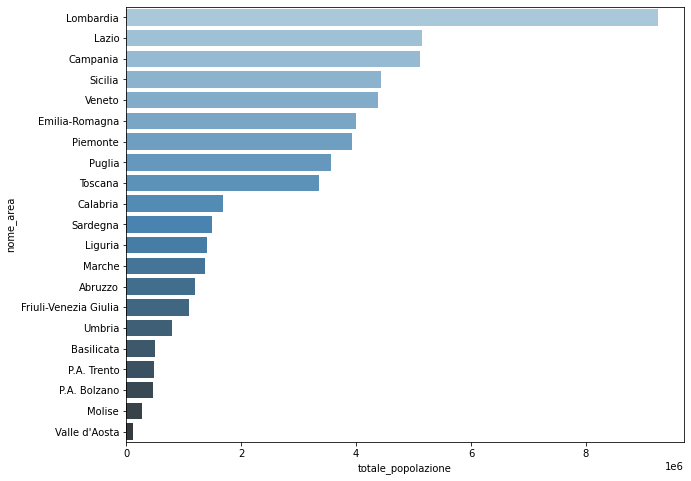

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

df2 = df.groupby('nome_area', as_index = True)[["totale_popolazione"]].sum().sort_values('totale_popolazione',ascending = False).reset_index()

#server per i colori gradients
import seaborn as sns

#  per ingrandire la larghezza del plot o del grafico
#  devi mettere anche ---->   ax = ax
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

fig = plt.figure()
sns.barplot(x = df2["totale_popolazione"], y = df2["nome_area"], palette = "Blues_d", ax = ax)

e. Eliminare la colonna ‘area’

In [10]:
df.drop(columns=["area"], inplace = True)
df

,nome_area,fascia_anagrafica,totale_popolazione
0,Abruzzo,12-19,94727
1,Abruzzo,20-29,125230
2,Abruzzo,30-39,146965
3,Abruzzo,40-49,187162
4,Abruzzo,50-59,208686
...,...,...,...
163,Veneto,40-49,715790
164,Veneto,50-59,806474
165,Veneto,60-69,610635
166,Veneto,70-79,494721


f. Visualizzare le fasce anagrafiche che hanno un numero di persone compreso tra 5 e 7 milioni

In [11]:
df.loc[(df["totale_popolazione"] <= 7000000) & (df["totale_popolazione"] >= 5000000),["fascia_anagrafica"]]

,fascia_anagrafica


In [12]:
df.groupby("fascia_anagrafica")[["totale_popolazione"]].sum()



,totale_popolazione
fascia_anagrafica,
12-19,4627514
20-29,6013709
30-39,6794332
40-49,8783291
50-59,9649960
60-69,7553486
70-79,6019293
80+,4568359


In [13]:
df1 = df.groupby("fascia_anagrafica", as_index = False)["totale_popolazione"].sum()
df1

,fascia_anagrafica,totale_popolazione
0,12-19,4627514
1,20-29,6013709
2,30-39,6794332
3,40-49,8783291
4,50-59,9649960
5,60-69,7553486
6,70-79,6019293
7,80+,4568359


In [14]:
df2 = df.groupby("fascia_anagrafica", as_index = False)["totale_popolazione"].sum()
df2
df2.loc[(df2["totale_popolazione"] <= 7000000) & (df2["totale_popolazione"] >= 5000000),["fascia_anagrafica","totale_popolazione"]]

,fascia_anagrafica,totale_popolazione
1,20-29,6013709
2,30-39,6794332
6,70-79,6019293


g. Visualizzare il grafico a torta dei dati dell’esercizio 6. Visualizzare negli spicchi sia il numero assoluto
degli abitanti (ad esempio 4345767) sia la percentuale

In [15]:
df3 = df1.loc[(df1["totale_popolazione"] <= 7000000) & (df1["totale_popolazione"] >= 5000000),["fascia_anagrafica","totale_popolazione"]]

ele = list(df3["totale_popolazione"])

tot = sum(ele)

print(tot)

18827334


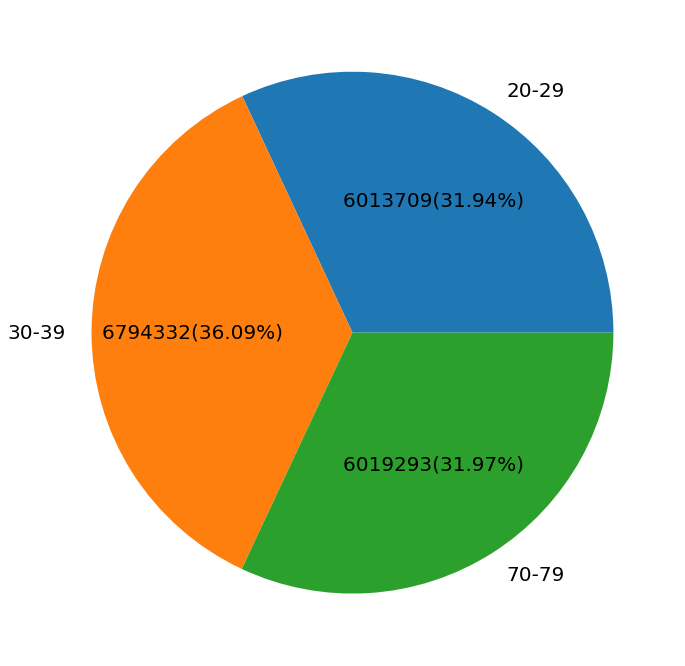

In [18]:
#############          IIIIIIIIMMMMMMMPPPPPPPOOOOORRRRRRRTTTTTTAAAAAANNNNNNTTTTTTEEEEEEEE

df3 = df1.loc[(df1["totale_popolazione"] <= 7000000) & (df1["totale_popolazione"] >= 5000000),["fascia_anagrafica","totale_popolazione"]]

ele = list(df3["totale_popolazione"])
totale = sum(ele)

fig = plt.figure(figsize = (12,12))
ax = plt.axes()

plt.rcParams.update({"font.size":20})

#   server per scrivere solo il valore assoluto nel graffico
#ax.pie(df3["totale_popolazione"], labels = df3["fascia_anagrafica"], autopct =lambda p: '{:.0f}'.format(p * totale / 100))


###   per far vedere sia la percentuale sia il suo valore assoluto
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}({p:.2f}%) '.format(p=pct,v=val)
    return my_autopct

values = list(df3["totale_popolazione"])

ax.pie(df3["totale_popolazione"], labels = df3["fascia_anagrafica"], autopct=make_autopct(values))
plt.show()

h. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due colonne e tre
righe e deve contenere nella prima colonna tre volte il grafico a barre e nelle seconda colonna tre volte
il grafico a torta

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)



ax1.barh(df2["nome_area"],df2["totale_popolazione"])
ax2.barh(df2["nome_area"],df2["totale_popolazione"])
ax3.barh(df2["nome_area"],df2["totale_popolazione"])

ax4.pie(df3["totale_popolazione"], labels = df3["fascia_anagrafica"])
ax5.pie(df3["totale_popolazione"], labels = df3["fascia_anagrafica"])
ax6.pie(df3["totale_popolazione"], labels = df3["fascia_anagrafica"])


for ax in fig.get_axes():
    ax.label_outer()

i. Salvare il grafico in un file .png

In [ ]:
fig.savefig("myfig.png")